In [1]:
import pandas as panda
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
dataset = panda.read_csv('NAS.csv')
startLen = len(dataset)
dataset.dropna(inplace = True)
dataset


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [3]:
input = dataset.drop('High',axis='columns')
input = input.drop('Open',axis='columns')
input = input.drop('Low',axis='columns')
input = input.drop('Close',axis='columns')
input = input.drop('Adj Close',axis='columns')
input = input.drop('Volume',axis='columns')
input.head(10)

,Date
0,2003-12-18
1,2003-12-19
2,2003-12-22
3,2003-12-23
7,2003-12-29
8,2003-12-30
11,2004-01-02
12,2004-01-05
13,2004-01-06
14,2004-01-07


In [4]:
#floatDate = input
#for i in range(0, startLen):
 #   try:
  #      floatDate.Date[i] = float(floatDate.Date[i].split('-')[0]  + floatDate.Date[i].split('-')[1]
      #                            + floatDate.Date[i].split('-')[2])
   # except KeyError:
    #    i = 0
#floatDate

In [5]:
startDate = datetime.datetime(2003, 12, 18)
daysSinceStart = input
#Converting the date to number of days since the first date
for i in range(0, startLen):
    try:
        date = datetime.datetime(int(daysSinceStart.Date[i].split('-')[0]), int(daysSinceStart.Date[i].split('-')[1])
                                  , int(daysSinceStart.Date[i].split('-')[2]))
        
        timeDiff = date - startDate
        timeDiffSeconds = timeDiff.total_seconds()
        daysSinceStart.Date[i] = divmod(timeDiffSeconds, 86400)[0] #calculates day nr from seconds
    except KeyError:
        i = 0
daysSinceStart

,Date
0,0
1,1
2,4
3,5
7,11
...,...
4248,6143
4249,6144
4250,6145
4251,6146


In [6]:
price = dataset.Close
price.head(10)

0     19.139799
1     18.454201
2     18.054300
3     17.425800
7     17.254400
8     17.711500
11    17.768600
12    17.711500
13    17.597200
14    17.140100
Name: Close, dtype: float64

In [7]:
regObj = linear_model.LinearRegression()
regObj.fit(daysSinceStart,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regObj.predict([[20201016]]) #Linear Regression is bad

array([311038.95562619])

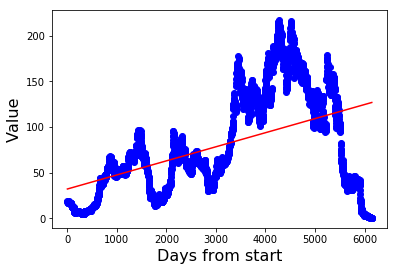

In [9]:
#%matplotlib inline
plt.xlabel('Days from start',fontsize=16)
plt.ylabel('Value',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(daysSinceStart,price, color='blue')
plt.plot(daysSinceStart,regObj.predict(daysSinceStart),color='red')

In [10]:
x = daysSinceStart
y = price.values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

y_test

array([[ 72.559799, 162.830994,   2.758   , ..., 123.408997, 172.526993,
         49.992001]])

In [11]:
from sklearn.preprocessing import StandardScaler 

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train =sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

y_test= sc_y.fit_transform(y_test) #For some reason returns a 2d array with only the first row populated [0] gets that array 
y_train= sc_y.fit_transform(y_train) #Same issue here

y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [12]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500, criterion='mse', random_state=0)
model.fit(x_train, y_train)

C:\Users\Helge\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Helge\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred = model.predict(x_test)
y_pred=y_pred.reshape(-1, 1)
y_pred = sc_y.transform(y_pred)

ValueError: non-broadcastable output operand with shape (1266,1) doesn't match the broadcast shape (1266,2952)

In [14]:
from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 0.0
MSE 0.0
RMSE 0.0
Score: 1.0
